2.1.4
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare     Cabin Embarked Cabin_deck  Family_size  
0         A/5 21171   7.2500  No Cabin        S          N            5  
1          PC 17599  71.2833       C85        C          C            3  
2  STON/O2. 3101282   7.9250  No Cabin        S          N          

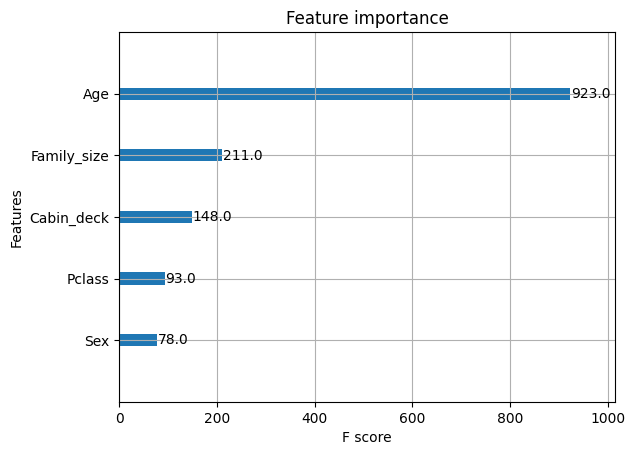

In [12]:
import numpy as np
import pandas as pd
import os 
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('/Users/dhanalakshmijothi/Desktop/Kaggle/titanic/train.csv')
test_data = pd.read_csv('/Users/dhanalakshmijothi/Desktop/Kaggle/titanic/test.csv')
gender_file = pd.read_csv('/Users/dhanalakshmijothi/Desktop/Kaggle/titanic/gender_submission.csv')

# Handle missing values
train_data['Cabin'] = train_data['Cabin'].fillna('No Cabin')
test_data['Cabin'] = train_data['Cabin'].fillna('No Cabin')

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['Cabin_deck'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'No Cabin')
test_data['Cabin_deck'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'No Cabin')

# Feature Engineering
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Pclass'] = pd.to_numeric(train_data['Pclass'], errors='coerce')
test_data['Pclass'] = pd.to_numeric(test_data['Pclass'], errors='coerce')

train_data['SibSp'] = pd.to_numeric(train_data['SibSp'], errors='coerce')
test_data['SibSp'] = pd.to_numeric(test_data['SibSp'], errors='coerce')

train_data['Family_size'] = train_data['SibSp'] + train_data['Pclass'] + 1
test_data['Family_size'] = test_data['SibSp'] + test_data['Pclass'] + 1

# Align the training and test datasets
train_test_data = train_data.align(test_data, join='left', axis=1)

# Check the first few rows of the processed data
print(train_data.head())

# Prepare training and test data
x_train = train_data.drop(columns=['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Cabin', 'Embarked'])
y_train = train_data['Survived']
x_test = test_data.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Cabin', 'Embarked'])

# Convert 'Cabin_deck' to numeric labels
x_train['Cabin_deck'] = x_train['Cabin_deck'].astype('category').cat.codes
x_test['Cabin_deck'] = x_test['Cabin_deck'].astype('category').cat.codes

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Prediction 
y_pred = model.predict(x_test)
print(f"Prediction Accuracy on Test Set: {accuracy_score(y_train, model.predict(x_train))}")

# Plot feature importance
xgb.plot_importance(model)
plt.show()

# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})

# Save the submission to a CSV file
submission.to_csv('/Users/dhanalakshmijothi/Desktop/Kaggle/titanic/submission.csv', index=False)



